<a href="https://colab.research.google.com/github/szambito/Numerical_Analysis_2025/blob/Stefano/Sunspots_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook implements an exercise where you are requested to run the SARIMAX model over some historical data on Sun activity to make future forecats. The dataset is available here: https://www.statsmodels.org/dev/examples/notebooks/generated/statespace_arma_0.html


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats
from statsmodels.graphics.api import qqplot

In [3]:
print(sm.datasets.sunspots.NOTE)

::

    Number of Observations - 309 (Annual 1700 - 2008)
    Number of Variables - 1
    Variable name definitions::

        SUNACTIVITY - Number of sunspots for each year

    The data file contains a 'YEAR' variable that is not returned by load.



Run the cell below to obtain and plot the Sun activity data.

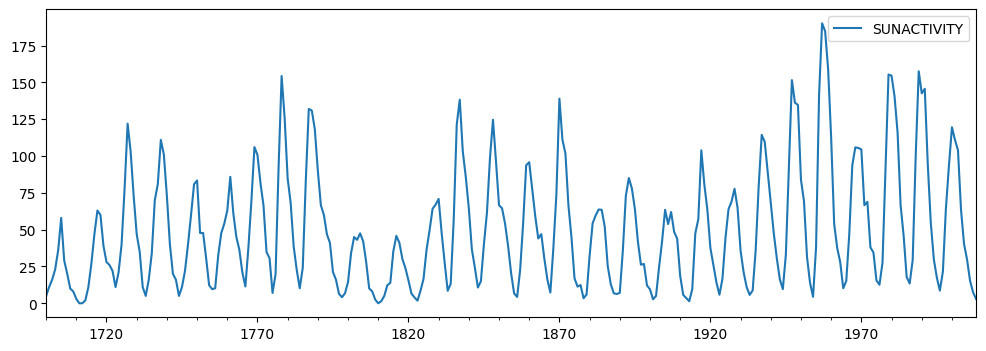

In [4]:
dta = sm.datasets.sunspots.load_pandas().data
dta.index = pd.Index(pd.date_range("1700", end="2009", freq="YE-DEC"))
del dta["YEAR"]
dta.plot(figsize=(12, 4));

Complete the cell below to define the range of SARIMAX parameters to scan, following the inline instructions.

In [5]:
# Exercise 4
# import itertools, and use it to generate different combinations of parameters for the SARIMAX model
import itertools

# The d and q parameters are given and equal to 0;
d = q = range(0, 1)

# Define the p parameter to be an integer between 2 and 4
p = range(2, 5)

# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, d and q triplets (i.e., P, D, Q)
# Use a value of 10 for the seasonality S
seasonal_pdq = [(x[0], x[1], x[2], 11) for x in list(itertools.product(p, d, q))]

In the cell below, find the optimal model parameters according to the AIC criterion.

In [6]:
# Exercise 5
# Define a SARIMAX model and identify the optimal parameters according to the AIC criterion
from statsmodels.tsa.statespace.sarimax import SARIMAX ### 1 point
import warnings
import traceback

warnings.filterwarnings("ignore")  # specify to ignore warning messages

# Identification of best model from different combinations of pdq and seasonal_pdq
best_score, best_param, best_paramSeasonal = float("inf"), None, None
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:

            mod = SARIMAX(dta, order=param, seasonal_order=param_seasonal, enforce_invertibility=False)
            results = mod.fit(disp=False)
            if results.aic < best_score:
                best_score, best_param, best_paramSeasonal = results.aic, param, param_seasonal
            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except Exception as e: ###
            print(f'Exception for ARIMA{param}x{param_seasonal}: {e}')
            traceback.print_exc()
            continue  # if fit fails, just continue to the next parameters combination

ARIMA(2, 0, 0)x(2, 0, 0, 11) - AIC:2646.33777947598
ARIMA(2, 0, 0)x(3, 0, 0, 11) - AIC:2642.778295118556
ARIMA(2, 0, 0)x(4, 0, 0, 11) - AIC:2642.688890420727
ARIMA(3, 0, 0)x(2, 0, 0, 11) - AIC:2648.197213713748
ARIMA(3, 0, 0)x(3, 0, 0, 11) - AIC:2644.399397035375
ARIMA(3, 0, 0)x(4, 0, 0, 11) - AIC:2644.092622591269
ARIMA(4, 0, 0)x(2, 0, 0, 11) - AIC:2639.0521358672977
ARIMA(4, 0, 0)x(3, 0, 0, 11) - AIC:2638.6059298544424
ARIMA(4, 0, 0)x(4, 0, 0, 11) - AIC:2638.7570905402085


Now print the best set of parameters according to the AIC.

In [7]:
# Exercise 6
# Print the best set of parameters according to the AIC
print('The best model is ARIMA{}x{} - AIC:{}'.format(best_param, best_paramSeasonal, best_score))

The best model is ARIMA(4, 0, 0)x(3, 0, 0, 11) - AIC:2638.6059298544424


Below, re-fit the model using the optimal parameters.

In [8]:
# Exercise 7
# Fit the model once again using the optimal parameters, and print a summary of the results

mod = SARIMAX(dta, order=best_param, seasonal_order=best_paramSeasonal, enforce_invertibility=False)
results=mod.fit() ### 1 point model fit
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                        SUNACTIVITY   No. Observations:                  309
Model:             SARIMAX(4, 0, 0)x(3, 0, 0, 11)   Log Likelihood               -1311.303
Date:                            Mon, 19 May 2025   AIC                           2638.606
Time:                                    17:37:54   BIC                           2668.473
Sample:                                12-31-1700   HQIC                          2650.547
                                     - 12-31-2008                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2596      0.050     25.347      0.000       1.162       1.357
ar.L2         -0.3776      0.077   

Run the two cells below to obtain the forecasts for the 20 years following the last date in the dataset, and to plot them.

In [9]:
# Exercise 8
# Forecast future values for 20 steps
n_forecast = 20  # Number of steps to forecast
forecast = results.get_forecast(steps=n_forecast)
last_date = dta.index[-1]
freq = dta.index.freq
forecast_index = pd.date_range(start=last_date, periods=n_forecast + 1, freq=freq)[1:]

# Extract forecasted values and confidence intervals
forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int()


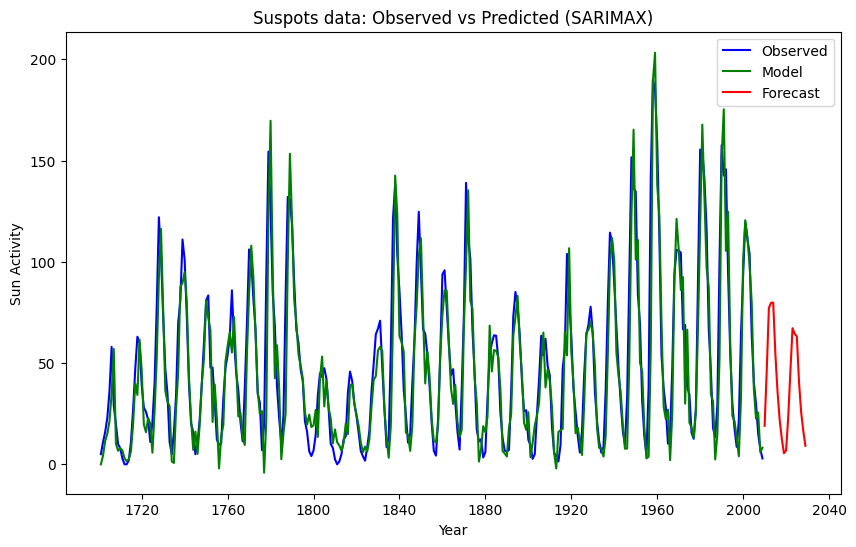

In [10]:
# Exercise 9
# Plot the results, the predicted trend according to the model, and the forecast
plt.figure(figsize=(10, 6))
predictions = results.predict()
# Plot the original data
plt.plot(dta.index, dta.to_numpy(), label='Observed', color='blue')
# Plot the date (x-axis) vs predictions
plt.plot(dta.index, predictions.to_numpy(), label='Model', color='green')
# Plot the forecast index (x-axis) vs forecast values
plt.plot(forecast_index, forecast_values.to_numpy(), label='Forecast', color='red')
plt.xlabel('Year')
plt.ylabel('Sun Activity')
plt.title('Suspots data: Observed vs Predicted (SARIMAX)')
plt.legend()
plt.show()